In [2]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import precision_recall_curve
import itertools
import time
from datetime import datetime

In [3]:
#reading in data
hotels = pd.read_csv('Hotel Reservations.csv')
hotels.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
# Mapping response to 0 (Not Canceled) and 1 (Canceled)
hotels['booking_status'].replace(['Canceled', 'Not_Canceled'],[0, 1], inplace=True)

In [5]:
hotels.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,1
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,1
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,0


In [6]:
# Split train and test datasets
y = hotels.booking_status
X = hotels.drop('booking_status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True, stratify=y)
train, test = train_test_split(hotels, test_size=0.25, random_state=25, shuffle=True, stratify=y)

# Developing Baseline Model

In [7]:
# forward error - try fixing the error
# compare number of 1 and 0 in test dataset and that predicted by the model
# This baseline model is all the predictors so we will try to manipulate it - yes can do interaction
    # Justify the interaction with the variable selection methods
    # Variable selection is a good place to start


In [49]:
#Baseline model
baseline_model = sm.logit('booking_status~no_of_adults+no_of_children+no_of_weekend_nights+no_of_week_nights+\
type_of_meal_plan+required_car_parking_space+room_type_reserved+lead_time+arrival_year+\
arrival_month+arrival_date+market_segment_type+repeated_guest+no_of_previous_cancellations+\
no_of_previous_bookings_not_canceled+avg_price_per_room+no_of_special_requests', data = train).fit()
baseline_model.summary()

         Current function value: 0.422790
         Iterations: 35


/Users/linhnganguyen/opt/anaconda3/lib/python3.9/site-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27178
Method:                           MLE   Df Model:                           27
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.3316
Time:                        20:28:17   Log-Likelihood:                -11502.
converged:                      False   LL-Null:                       -17208.
Covariance Type:            nonrobust   LLR p-value:                     0.000
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                             1020.6833    118.165      8.638      0.000     789.083    1252.283
type_of_meal_plan[T.Meal Plan 2]        -0.1426      0.065     -2.196      0.028      -0.270      -0.015
type_of_meal_plan[T.Meal Plan 3]       -30.3389   2.54e+06  -1.19e-05      1.000   -4.98e+06    4.98e+06
type_of_meal_plan[T.Not Selected]       -0.2033      0.051     -3.970      0.000      -0.304      -0.103
room_type_reserved[T.Room_Type 2]        0.3762      0.127      2.953      0.003       0.126       0.626
room_type_reserved[T.Room_Type 3]        0.2561      1.362      0.188      0.851      -2.414       2.926
room_type_reserved[T.Room_Type 4]        0.2663      0.052      5.155      0.000       0.165       0.367
room_type_reserved[T.Room_Type 5]        0.6286      0.199      3.163      0.002       0.239       1.018
room_type_reserved[T.Room_Type 6]        0.7886      0.145      5.438      0.000       0.504       1.073
room_type_reserved[T.Room_Type 7]        1.5009      0.307      4.887      0.000       0.899       2.103
market_segment_type[T.Complementary]    49.8044   2.54e+06   1.96e-05      1.000   -4.98e+06    4.98e+06
market_segment_type[T.Corporate]         1.2619      0.253      4.985      0.000       0.766       1.758
market_segment_type[T.Offline]           2.1832      0.242      9.039      0.000       1.710       2.657
market_segment_type[T.Online]            0.4034      0.239      1.691      0.091      -0.064       0.871
no_of_adults                            -0.0668      0.036     -1.844      0.065      -0.138       0.004
no_of_children                          -0.1104      0.058     -1.911      0.056      -0.224       0.003
no_of_weekend_nights                    -0.1375      0.019     -7.175      0.000      -0.175      -0.100
no_of_week_nights                       -0.0420      0.012     -3.546      0.000      -0.065      -0.019
required_car_parking_space               1.5982      0.135     11.832      0.000       1.333       1.863
lead_time                               -0.0155      0.000    -60.531      0.000      -0.016      -0.015
arrival_year                            -0.5046      0.059     -8.618      0.000      -0.619      -0.390
arrival_month                            0.0372      0.006      5.938      0.000       0.025       0.049
arrival_date                            -0.0019      0.002     -0.987      0.323      -0.006       0.002
repeated_guest                           2.0632      0.477      4.329      0.000       1.129       2.997
no_of_previous_cancellations            -0.2248      0.068     -3.325      0.001      -0.357      -0.092
no_of_previous_bookings_not_canceled     0.0811      0.088      0.919      0.358      -0.092       0.254
avg_price_per_room                      -0.0183      0.001    -25.698      0.000      -0.020      -0.017
no_of_special_requests                   1.4974      0.029     51.063      0.000       1.44

In [50]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_data(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    print("ROC-AUC = {:.1%}".format(auc_value))

In [51]:
#Function to compute confusion matrix and prediction accuracy on test/train data
def confusion_matrix_accuracy(data,actual_values,model,cutoff=0.5):
#Predict the values using the Logit model
    pred_values = model.predict(data)
# Specify the bins
    bins=np.array([0,cutoff,1])
#Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins=bins)[0]
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
# Calculate the accuracy
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    precision = (cm[1,1])/(cm[0,1]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1])
    fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    return accuracy

0.8098213629346468 0.54


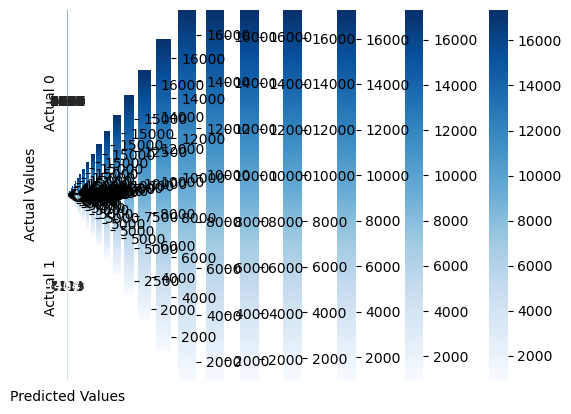

In [52]:
#Calculating best model accuracy and best cutoff 
best_accuracy = 0
best_cutoff = None

for cutoff in range(35,70):
    cutoff = cutoff / 100
    accuracy = confusion_matrix_accuracy(train, train.booking_status, baseline_model, cutoff = cutoff)
    
    if(accuracy >= best_accuracy):
        best_accuracy = accuracy
        best_cutoff = cutoff
        
print(best_accuracy, best_cutoff)

Classification accuracy = 81.0%
Precision = 84.6%
TPR or Recall = 87.6%
FNR = 12.4%
FPR = 32.6%
ROC-AUC = 86.4%


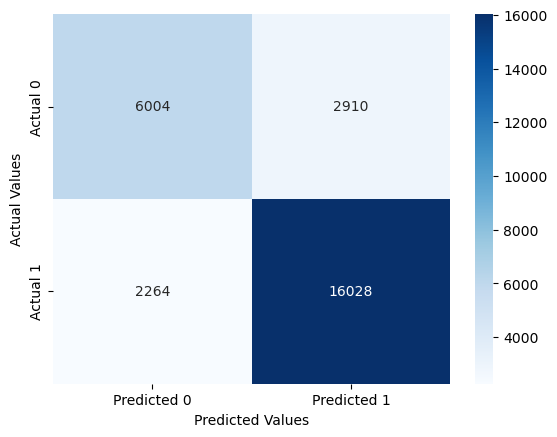

In [53]:
#matrix for train data
confusion_matrix_data(train, train.booking_status, baseline_model, cutoff = best_cutoff)

Classification accuracy = 80.2%
Precision = 83.9%
TPR or Recall = 87.3%
FNR = 12.7%
FPR = 34.4%
ROC-AUC = 86.2%


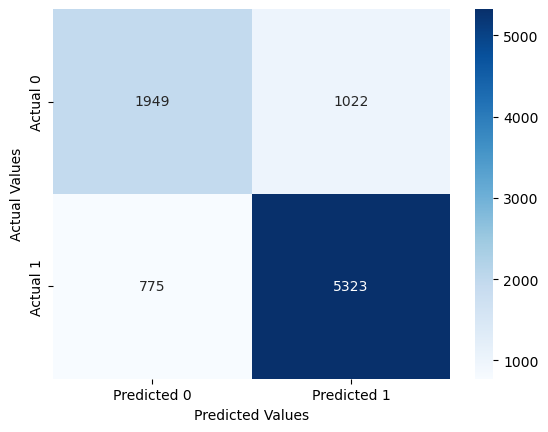

In [54]:
#matrix for test data
confusion_matrix_data(test, test.booking_status, baseline_model, cutoff = best_cutoff)

# Dummy Variables

In [13]:
# playing without dummy - use the original data instead of dummy

In [14]:
# Convert categorical variables to dummies and append to df 
dummy_market = pd.get_dummies(hotels.market_segment_type)
dummy_month = pd.get_dummies(hotels.arrival_month)
dummy_meal = pd.get_dummies(hotels.type_of_meal_plan)
dummy_room = pd.get_dummies(hotels.room_type_reserved)

hotels_dummy = pd.concat([hotels, dummy_market.drop('Aviation', axis = 1), dummy_month.drop(4, axis = 1), dummy_meal.drop('Meal Plan 3', axis = 1), dummy_room.drop('Room_Type 7', axis = 1)], axis = 1)
hotels_dummy.columns = hotels_dummy.columns.astype(str)
hotels_dummy.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,12,Meal Plan 1,Meal Plan 2,Not Selected,Room_Type 1,Room_Type 2,Room_Type 3,Room_Type 4,Room_Type 5,Room_Type 6
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,1,0,0,1,0,0,0,0,0
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,0,0,1,1,0,0,0,0,0
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,1,0,0,1,0,0,0,0,0
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,1,0,0,1,0,0,0,0,0
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,0,0,1,1,0,0,0,0,0


In [15]:
# Split train and test datasets with dummies
y = hotels_dummy.booking_status
X = hotels_dummy.drop('booking_status', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0, shuffle=True, stratify=y)
train, test = train_test_split(hotels_dummy, test_size=0.25, random_state=25, shuffle=True, stratify=y)

In [33]:
#extracting 2017 arrivals
svnteen_train = train[train['arrival_year'] == 2017]

svnteen_date = svnteen_train.groupby(hotels.arrival_date)
#extracting 2018 arrivals 
eiteen_train = train[train['arrival_year'] == 2018]

In [34]:
# Logistic regression model with dummy variables 
logit_model = sm.logit('booking_status~no_of_special_requests+lead_time+no_of_weekend_nights+\
no_of_weekend_nights*no_of_week_nights+no_of_previous_cancellations+\
no_of_previous_cancellations*no_of_previous_bookings_not_canceled+\
avg_price_per_room+avg_price_per_room*no_of_adults+avg_price_per_room*no_of_children', data = train).fit()
logit_model.summary()

Optimization terminated successfully.
         Current function value: 0.466366
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27192
Method:                           MLE   Df Model:                           13
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.2627
Time:                        18:56:15   Log-Likelihood:                -12688.
converged:                       True   LL-Null:                       -17208.
Covariance Type:            nonrobust   LLR p-value:                     0.000
=====================================================================================================================================
                                                                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                             5.3143      0.219     24.243      0.000       4.885       5.744
no_of_special_requests                                                1.1224      0.025     44.296      0.000       1.073       1.172
lead_time                                                            -0.0127      0.000    -60.848      0.000      -0.013      -0.012
no_of_weekend_nights                                                 -0.0697      0.029     -2.409      0.016      -0.126      -0.013
no_of_week_nights                                                     0.0221      0.018      1.252      0.211      -0.012       0.057
no_of_weekend_nights:no_of_week_nights                               -0.0453      0.008     -5.757      0.000      -0.061      -0.030
no_of_previous_cancellations                                         -0.0070      0.070     -0.101      0.920      -0.144       0.130
no_of_previous_bookings_not_canceled                                  0.6133      0.174      3.522      0.000       0.272       0.955
no_of_previous_cancellations:no_of_previous_bookings_not_canceled    -0.0501      0.021     -2.393      0.017      -0.091      -0.009
avg_price_per_room                                                   -0.0327      0.002    -17.483      0.000      -0.036      -0.029
no_of_adults                                                         -0.9304      0.108     -8.596      0.000      -1.143      -0.718
avg_price_per_room:no_of_adults                                       0.0065      0.001      7.298      0.000       0.005       0.008
no_of_children                                                       -0.7589      0.121     -6.252      0.000      -0.997      -0.521
avg_price_per_room:no_of_children                                     0.0049      0.001      6.547      0.000       0.003       0.006
=====================================================================================================================================
"""

In [35]:
predictions_17 = logit_model.predict(svnteen_train)
#predictions_17 = (predictions_17>best_cutoff).astype(int)
predictions_17

549      0.729008
24662    0.102562
28933    0.450126
34900    0.900384
5012     0.581289
           ...   
19403    0.815915
32857    0.812025
27416    0.846245
32819    0.890258
31659    0.699469
Length: 4842, dtype: float64

<AxesSubplot:ylabel='booking_status'>

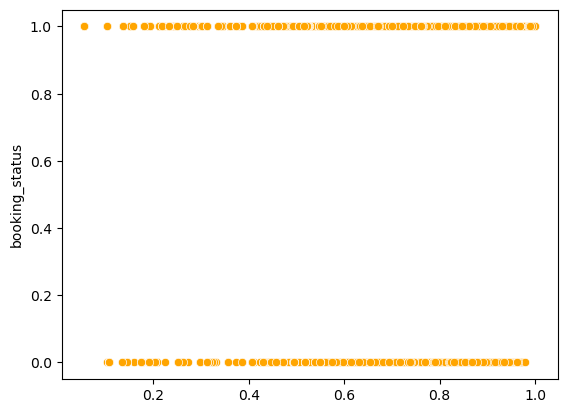

In [36]:
sns.scatterplot(x=predictions_17, y=svnteen_train.booking_status, color="orange")
#I really think I'm graphing this wrong or approaching this the wrong way
#Next steps: graph time on X and residuals on y... but does graphing residuals of a binary response make sense??

In [37]:
cols=[hotels.arrival_year, hotels.arrival_month, hotels.arrival_date]
hotels['date'] = hotels.apply(lambda x: str(x.arrival_year) + "-" + str(x.arrival_month) + "-" + str(x.arrival_date), axis="columns")
hotels['date']=pd.to_datetime(hotels['date'], infer_datetime_format = True, errors="coerce")

# Autocorrelation attempts

Since logistic regression does not utilize residuals, we cannot really use autocorrelation. However, there might be some correlation between month with the number of cancellation, so we attempted to look into that relationship.

First, I want to look at the different months and see number of overall booking as well as the number of cancellation for each month

In [38]:
monthly_cancel = hotels.groupby(hotels.arrival_month).booking_status.value_counts()
monthly_cancel

arrival_month  booking_status
1              1                  990
               0                   24
2              1                 1274
               0                  430
3              1                 1658
               0                  700
4              1                 1741
               0                  995
5              1                 1650
               0                  948
6              1                 1912
               0                 1291
7              1                 1606
               0                 1314
8              1                 2325
               0                 1488
9              1                 3073
               0                 1538
10             1                 3437
               0                 1880
11             1                 2105
               0                  875
12             1                 2619
               0                  402
Name: booking_status, dtype: int64

In [27]:
# create DataFrame
monthly_cancel = pd.DataFrame({'Did not cancel': [990, 1274, 1658, 1741, 1650, 1912, 1606, 2325, 3073, 3437, 2105, 2619],
                   'Cancelled': [24, 430, 700, 995, 948, 1291, 1314, 1488, 1538, 1880, 875, 402]}, 
                  index=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])
monthly_cancel

,Did not cancel,Cancelled
Jan,990,24
Feb,1274,430
Mar,1658,700
Apr,1741,995
May,1650,948
Jun,1912,1291
Jul,1606,1314
Aug,2325,1488
Sept,3073,1538
Oct,3437,1880


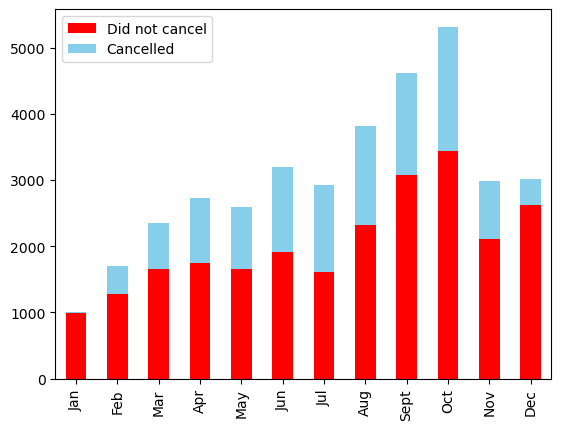

In [28]:
monthly_cancel.plot(kind='bar', stacked=True, color=['red', 'skyblue'])
plt.show()

We can see that there are more hotel booking around August, September, and October. One way that we can explain this is that INN hotels is a decently cheap hotel and late August to mid October is pretty cheap off-season travel time so many people who want to save money will choose to travel during this time. However, this graph does not help us visualize the rate of cancellation for each month. Therefore I choose create another graph that shows the percentage of cancellation for each month.

In [31]:
monthly_cancel_percent = monthly_cancel.copy()
monthly_cancel_percent['Total'] = monthly_cancel_percent['Did not cancel'] + monthly_cancel_percent['Cancelled']
monthly_cancel_percent['Did not cancel percent'] = monthly_cancel_percent['Did not cancel']/monthly_cancel_percent['Total']
monthly_cancel_percent['Cancel percent'] = monthly_cancel_percent['Cancelled']/monthly_cancel_percent['Total']
monthly_cancel_percent = monthly_cancel_percent.drop(['Did not cancel', 'Cancelled', 'Total'], axis = 1)
monthly_cancel_percent.head()

,Did not cancel percent,Cancel percent
Jan,0.976331,0.023669
Feb,0.747653,0.252347
Mar,0.703138,0.296862
Apr,0.636330,0.363670
May,0.635104,0.364896


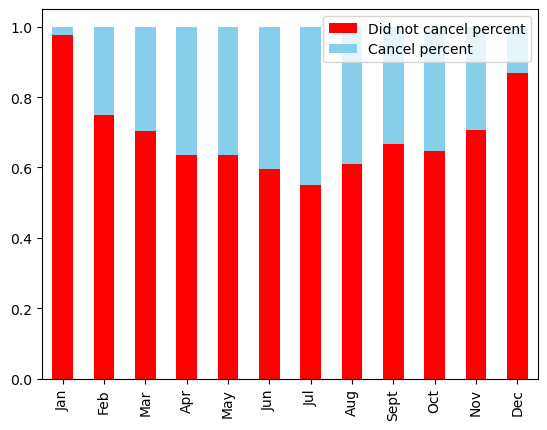

In [32]:
monthly_cancel_percent.plot(kind='bar', stacked=True, color=['red', 'skyblue'])
plt.show()

All of the months have a relatively similar rate of cancellation with the exception of January and December. July has a slightly higher rate of cancellation, but I don't think that it is too significant. Therefore, we can conclude that generally, even though there is a correlation between the totally number of reservations and the month of the year, there seems to be no correlation between the percentage of cancellation. 

In [70]:
hotels.corrwith(hotels.booking_status).sort_values(ascending = False)

booking_status                          1.000000
no_of_special_requests                  0.253070
repeated_guest                          0.107287
required_car_parking_space              0.086185
no_of_previous_bookings_not_canceled    0.060179
no_of_previous_cancellations            0.033728
arrival_month                           0.011233
arrival_date                           -0.010629
no_of_children                         -0.033078
no_of_weekend_nights                   -0.061563
no_of_adults                           -0.086920
no_of_week_nights                      -0.092996
avg_price_per_room                     -0.142569
arrival_year                           -0.179529
lead_time                              -0.438538
dtype: float64

Since there are too many variables for me to even run forward or backward selection on my computer. I want to manually knockdown a few of the predictors. First I tried to just choose predictors that have a correlation with booking_status higher than 0.10

In [71]:
baseline_model1 = sm.logit('booking_status~avg_price_per_room+arrival_year+lead_time+no_of_special_requests+repeated_guest', data = train).fit()
baseline_model1.summary()

Optimization terminated successfully.
         Current function value: 0.462980
         Iterations 11


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27200
Method:                           MLE   Df Model:                            5
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                  0.2680
Time:                        20:52:52   Log-Likelihood:                -12596.
converged:                       True   LL-Null:                       -17208.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept               2120.0063    100.315     21.134      0.000    1923.393    2316.620
avg_price_per_room        -0.0173      0.001    -34.582      0.000      -0.018      -0.016
arrival_year              -1.0491      0.050    -21.101      0.000      -1.147      -0.952
lead_time                 -0.0124      0.000    -60.020      0.000      -0.013      -0.012
no_of_special_requests     1.1171      0.025     44.410      0.000       1.068       1.166
repeated_guest             2.1152      0.291      7.280      0.000       1.546       2.685
==========================================================================================
"""

Classification accuracy = 78.4%
Precision = 81.4%
TPR or Recall = 87.9%
FNR = 12.1%
FPR = 41.1%
ROC-AUC = 83.2%


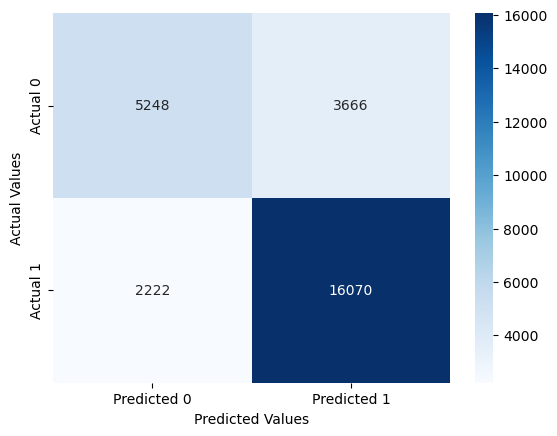

In [72]:
#matrix for train data
confusion_matrix_data(train, train.booking_status, baseline_model1, cutoff = best_cutoff)

Classification accuracy = 77.9%
Precision = 81.0%
TPR or Recall = 87.8%
FNR = 12.2%
FPR = 42.2%
ROC-AUC = 82.8%


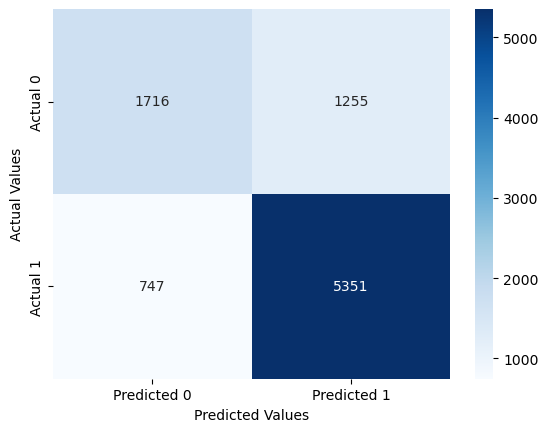

In [64]:
#matrix for train data
confusion_matrix_data(test, test.booking_status, baseline_model1, cutoff = best_cutoff)

This model is not as accurate as the model that we developed earlier. Furthermore, its false positive

In [66]:
#Baseline model
baseline_model2 = sm.logit('booking_status~arrival_year+arrival_month', data = train).fit()
baseline_model2.summary()

Optimization terminated successfully.
         Current function value: 0.612066
         Iterations 14


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:         booking_status   No. Observations:                27206
Model:                          Logit   Df Residuals:                    27203
Method:                           MLE   Df Model:                            2
Date:                Sun, 05 Mar 2023   Pseudo R-squ.:                 0.03231
Time:                        20:32:33   Log-Likelihood:                -16652.
converged:                       True   LL-Null:                       -17208.
Covariance Type:            nonrobust   LLR p-value:                3.581e-242
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      2743.8576     90.686     30.257      0.000    2566.116    2921.599
arrival_year     -1.3593      0.045    -30.249      0.000      -1.447      -1.271
arrival_month    -0.0408      0.004     -9.252      0.000      -0.049      -0.032
=================================================================================
"""

Classification accuracy = 67.2%
Precision = 67.2%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 100.0%
ROC-AUC = 60.3%


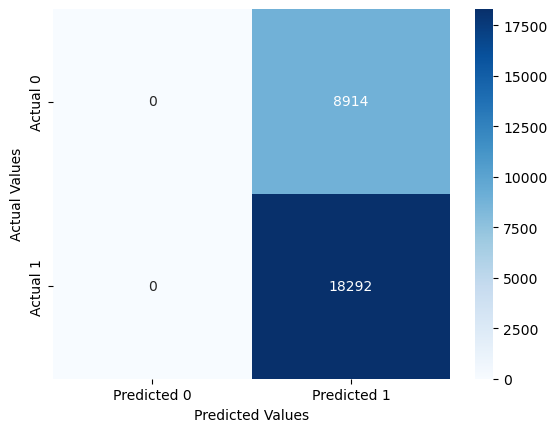

In [68]:
#matrix for train data
confusion_matrix_data(train, train.booking_status, baseline_model2, cutoff = best_cutoff)

Classification accuracy = 67.2%
Precision = 67.2%
TPR or Recall = 100.0%
FNR = 0.0%
FPR = 100.0%
ROC-AUC = 60.3%


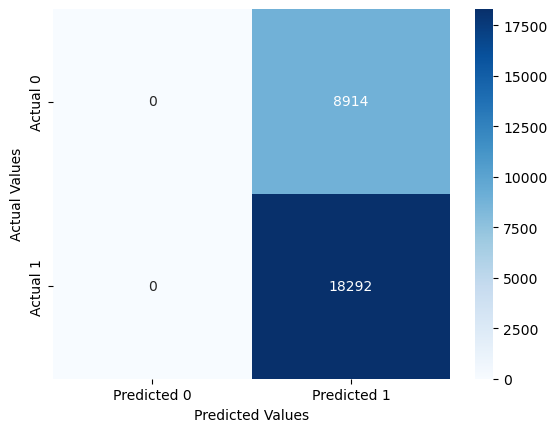

In [69]:
#matrix for train data
confusion_matrix_data(train, train.booking_status, baseline_model2, cutoff = best_cutoff)